In [1]:
# 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('C:/Users/e.sansebastian/OneDrive - EXPONDO/Ironhack/Weeks/Week_5/Mid_bootcamp_project/src')

In [3]:
from functions import *

In [4]:
# We read the raw data into a dataframe. We use the separator ";" in order to be able to properly separate the columns
mkt_clean=pd.read_csv("C:/Users/e.sansebastian/OneDrive - EXPONDO/Ironhack/Weeks/Week_5/Mid_bootcamp_project/mid_project/data/cleaned/cleaned_marketing_df.csv")

In [5]:
mkt_clean.head()

,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,date,month,quarter,week_of_year,age_range
0,1,Innovate Industries,Email,men,30 days,Google Ads,0.04,16.174,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,1,1,53,18-24
1,2,NexGen Systems,Email,women,60 days,Google Ads,0.12,11.566,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,1,1,53,35-44
2,3,Alpha Innovations,Influencer,men,30 days,YouTube,0.07,10.200,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,1,1,53,25-34
3,4,DataTech Solutions,Display,all genders,60 days,YouTube,0.11,12.724,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,1,1,1,all ages
4,5,NexGen Systems,Email,men,15 days,YouTube,0.05,16.452,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,1,1,1,25-34


In [6]:
# We explore the data to see potential need of cleaning it.
mkt_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   campaign_id       200000 non-null  int64  
 1   company           200000 non-null  object 
 2   campaign_type     200000 non-null  object 
 3   target_audience   200000 non-null  object 
 4   duration          200000 non-null  object 
 5   channel_used      200000 non-null  object 
 6   conversion_rate   200000 non-null  float64
 7   acquisition_cost  200000 non-null  float64
 8   roi               200000 non-null  float64
 9   location          200000 non-null  object 
 10  language          200000 non-null  object 
 11  clicks            200000 non-null  int64  
 12  impressions       200000 non-null  int64  
 13  engagement_score  200000 non-null  int64  
 14  customer_segment  200000 non-null  object 
 15  date              200000 non-null  object 
 16  month             20

In [7]:
location_roi=mkt_clean.groupby("location").agg({"roi":"mean"}).reset_index()
location_roi

,location,roi
0,Chicago,5.001590
1,Houston,5.007203
2,Los Angeles,5.010876
3,Miami,5.012282
4,New York,4.980228


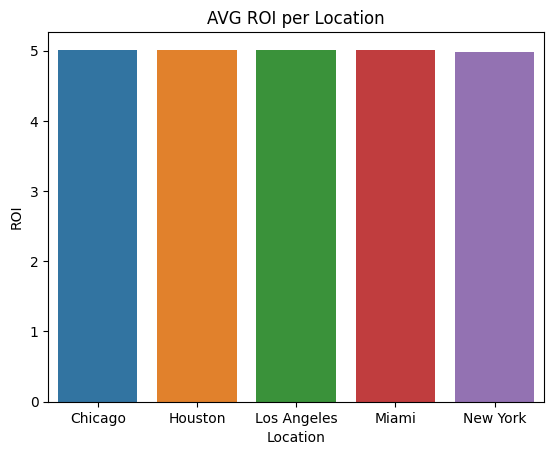

In [12]:
sns.barplot(x="location", y="roi", data=location_roi,hue="location")
plt.xlabel("Location")
plt.ylabel("ROI")
plt.title("AVG ROI per Location")
plt.show()

In [9]:
# We are going to define a function which takes a list of columns and returns a table with the mean of a specific table. Then plots those grouped by tables 
# into barplots

In [15]:
duration_roi=mkt_clean.groupby("duration").agg({"roi":"mean"}).reset_index()
display(duration_roi)


,duration,roi
0,15 days,4.996720
1,30 days,5.008887
2,45 days,4.997627
3,60 days,5.006480


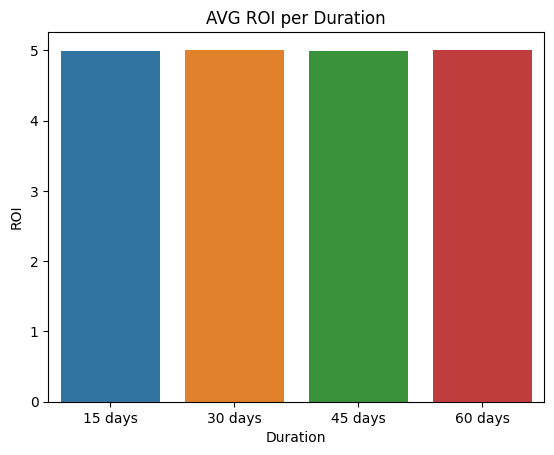

In [16]:
sns.barplot(x="duration", y="roi", data=duration_roi,hue="duration")
plt.xlabel("Duration")
plt.ylabel("ROI")
plt.title("AVG ROI per Duration")
plt.show()

In [17]:
target_audience_roi=mkt_clean.groupby("target_audience").agg({"roi":"mean"}).reset_index()
display(target_audience_roi)

,target_audience,roi
0,all genders,5.005174
1,men,5.001685
2,women,5.001822


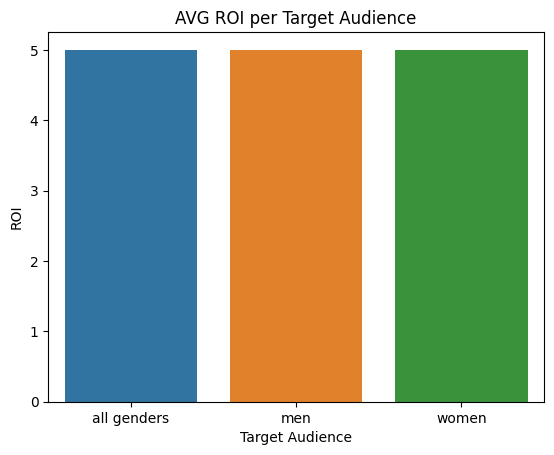

In [21]:
sns.barplot(x="target_audience", y="roi", data=target_audience_roi,hue="target_audience")
plt.xlabel("Target Audience")
plt.ylabel("ROI")
plt.title("AVG ROI per Target Audience")
plt.show()

In [47]:
channel_duration_roi = mkt_clean.groupby(["campaign_type", "duration"]).agg({"roi": "mean"}).round(2).reset_index()
display(channel_duration_roi)

,campaign_type,duration,roi
0,Display,15 days,5.00
1,Display,30 days,5.01
2,Display,45 days,5.01
3,Display,60 days,5.01
4,Email,15 days,5.00
5,Email,30 days,5.01
6,Email,45 days,4.97
7,Email,60 days,5.00
8,Influencer,15 days,4.99
9,Influencer,30 days,5.02


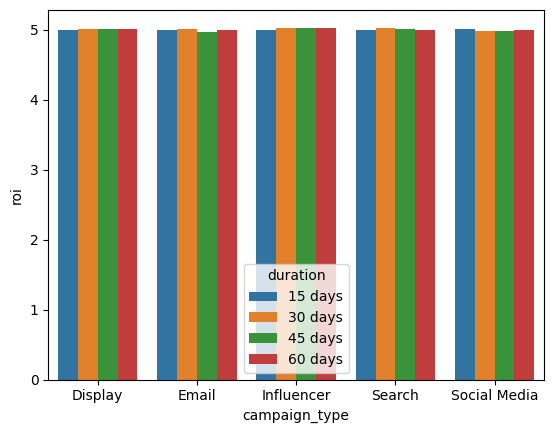

In [48]:
fig= (20, 20)
#tidy = df.melt(id_vars='Factor').rename(columns=str.title)
sns.barplot(x='campaign_type', y='roi', hue='duration', data=channel_duration_roi)
plt.show(fig)
#sns.despine(fig)

In [49]:
customer_segment_roi=mkt_clean.groupby("customer_segment").agg({"roi":"mean"}).reset_index()
display(customer_segment_roi)

,customer_segment,roi
0,Fashionistas,5.000962
1,Foodies,5.004376
2,Health & Wellness,5.003202
3,Outdoor Adventurers,4.999393
4,Tech Enthusiasts,5.004234


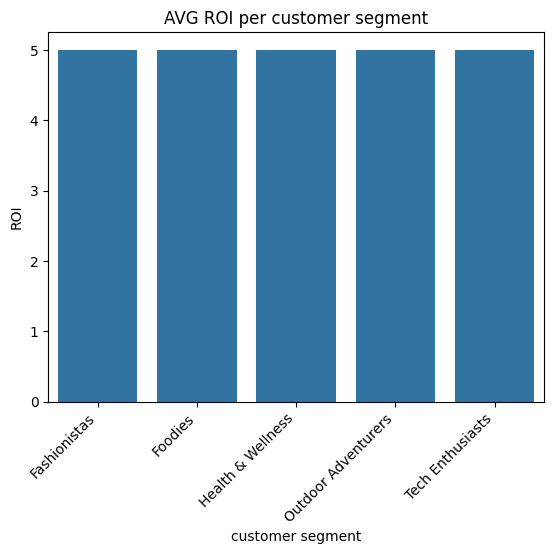

In [53]:
sns.barplot(x="customer_segment", y="roi", data=customer_segment_roi)
plt.xlabel("customer segment")
plt.ylabel("ROI")
plt.title("AVG ROI per customer segment")
plt.xticks(rotation=45, ha="right")
plt.show()

In [54]:
location_language_roi = mkt_clean.groupby(["location", "language"]).agg({"roi": "mean"}).round(2).reset_index()
display(location_language_roi)

,location,language,roi
0,Chicago,English,4.99
1,Chicago,French,5.05
2,Chicago,German,4.99
3,Chicago,Mandarin,5.00
4,Chicago,Spanish,5.00
5,Houston,English,5.00
6,Houston,French,5.00
7,Houston,German,5.02
8,Houston,Mandarin,5.01
9,Houston,Spanish,5.00


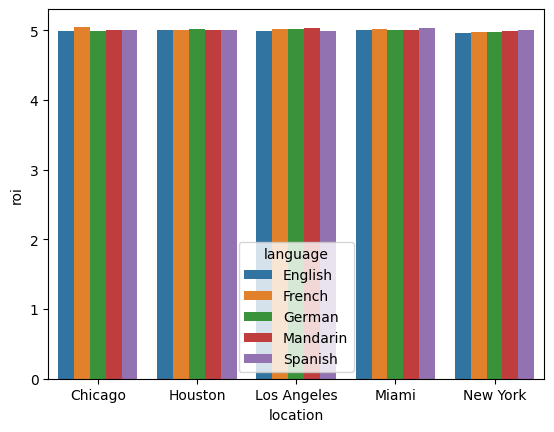

In [55]:
fig= (20, 20)
#tidy = df.melt(id_vars='Factor').rename(columns=str.title)
sns.barplot(x='location', y='roi', hue='language', data=location_language_roi)
plt.show(fig)
#sns.despine(fig)